In [1]:
library(knitr)

In [2]:
library(caret)

Loading required package: lattice

Loading required package: ggplot2



In [3]:
library(rpart)

In [4]:
library(rpart.plot)

In [7]:
library(rattle)

In [8]:
library(randomForest)

randomForest 4.6-14

Type rfNews() to see new features/changes/bug fixes.


Attaching package: 'randomForest'


The following object is masked from 'package:rattle':

    importance


The following object is masked from 'package:ggplot2':

    margin




In [10]:
library("corrplot")

corrplot 0.84 loaded



In [11]:
dataTrain <- "C:\\Users\\Ejer\\Documents\\Rstudio_Coursera\\pml-training (1).csv"
#download data to Train

In [15]:
dataTest <- "C:\\Users\\Ejer\\Documents\\Rstudio_Coursera\\pml-testing.csv"
#download data to Test

In [16]:
training <- read.csv(dataTrain)
#reading training csv datafile

In [17]:
testing <- read.csv(dataTest)
#Reading testing csv datafile

In [18]:
inTrain  <- createDataPartition(training$classe, p=0.7, list=FALSE)
TrainSet <- training[inTrain, ]
TestSet  <- training[-inTrain, ]
#Data splitting in 70% to train and 30% to test. Then testset remains intouch.

In [19]:
dim(training); dim(testing);

[1] 19622   160

[1]  20 160

In [20]:
nearTozero <- nearZeroVar(TrainSet)
TrainSet <- TrainSet[, -nearTozero]
TestSet  <- TestSet[, -nearTozero]
#diagnostic of TrainSet and TestSet with few unique values.

In [21]:
dim(TrainSet);dim(TestSet);
#after cleaning the dataset these are the result data Train and TestSet.

[1] 13737   106

[1] 5885  106

In [28]:
AllNA    <- sapply(TrainSet, function(x) mean(is.na(x))) > 0
#counts and then removes the unknown values in Train and TestSet.

In [29]:
TrainSet <- TrainSet[, AllNA==FALSE]
TestSet  <- TestSet[, AllNA==FALSE]

In [30]:
dim(TrainSet);dim(TestSet);

[1] 13737    59

[1] 5885   59

In [31]:
selecting <- names(testing[,colSums(is.na(testing)) == 0])[8:59]
#selection only of the testing features.

In [33]:
training <- training[,c(selecting,"classe")]
testing <- testing[,c(selecting,"problem_id")]

In [34]:
dim(training); dim(testing);

[1] 19622    53

[1] 20 53

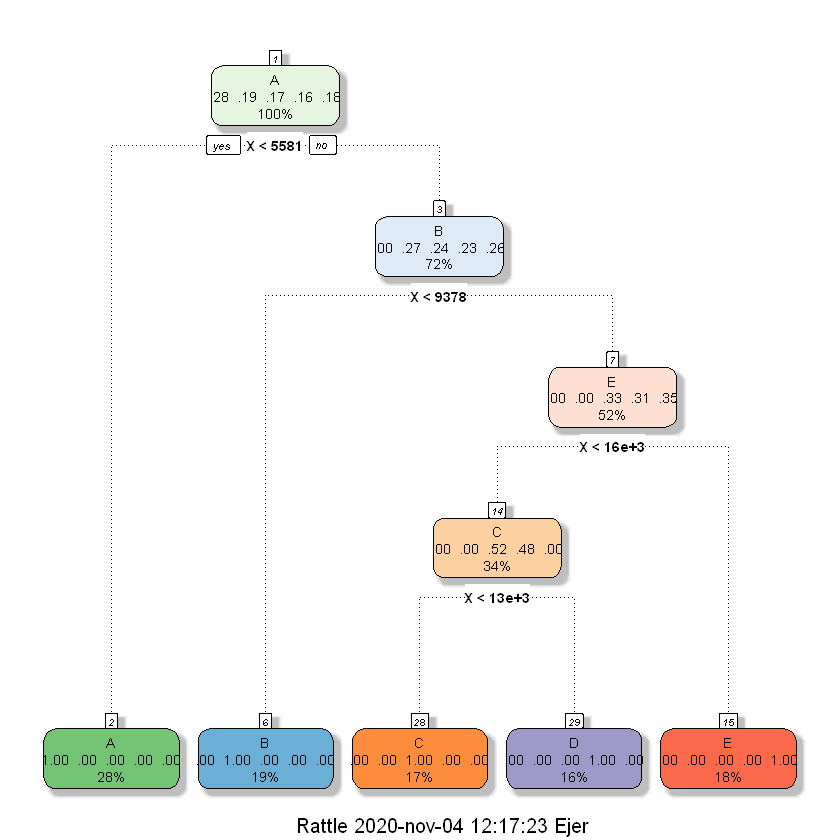

In [36]:
#Construction andf Accuracy analysis of Decission Tree model
set.seed(12345)
modFitDT<-rpart(classe ~ ., data=TrainSet, method="class")
fancyRpartPlot(modFitDT)

In [37]:
predictDT <- predict(modFitDT, newdata=TestSet, type="class")
confusionMatrixDT <- confusionMatrix(predictDT, TestSet$classe)
confusionMatrixDT

Confusion Matrix and Statistics

          Reference
Prediction    A    B    C    D    E
         A 1674    0    0    0    0
         B    0 1139    0    0    0
         C    0    0 1024    0    0
         D    0    0    2  964    0
         E    0    0    0    0 1082

Overall Statistics
                                     
               Accuracy : 0.9997     
                 95% CI : (0.9988, 1)
    No Information Rate : 0.2845     
    P-Value [Acc > NIR] : < 2.2e-16  
                                     
                  Kappa : 0.9996     
                                     
 Mcnemar's Test P-Value : NA         

Statistics by Class:

                     Class: A Class: B Class: C Class: D Class: E
Sensitivity            1.0000   1.0000   0.9981   1.0000   1.0000
Specificity            1.0000   1.0000   1.0000   0.9996   1.0000
Pos Pred Value         1.0000   1.0000   1.0000   0.9979   1.0000
Neg Pred Value         1.0000   1.0000   0.9996   1.0000   1.0000
Prevalence      

In [38]:
#Decission Tree accuracy : 0.9997

In [49]:
#Construction andf Accuracy analysis of Random Forest model
set.seed(12345)
controlRF <- trainControl(method="cv", number=3, verboseIter=FALSE)
modFitRF <- train(classe ~ ., data=TrainSet, method="rf", trControl=controlRF)
modFitRF$finalModel


Call:
 randomForest(x = x, y = y, mtry = param$mtry) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 41

        OOB estimate of  error rate: 0.02%
Confusion matrix:
     A    B    C    D    E  class.error
A 3906    0    0    0    0 0.0000000000
B    1 2657    0    0    0 0.0003762227
C    0    1 2395    0    0 0.0004173623
D    0    0    0 2252    0 0.0000000000
E    0    0    0    1 2524 0.0003960396

In [50]:
predictRF <- predict(modFitRF, newdata=TestSet)
confussionMatrixRF <- confusionMatrix(predictRF, TestSet$classe)
confussionMatrixRF

Confusion Matrix and Statistics

          Reference
Prediction    A    B    C    D    E
         A 1674    0    0    0    0
         B    0 1139    1    0    0
         C    0    0 1025    0    0
         D    0    0    0  964    0
         E    0    0    0    0 1082

Overall Statistics
                                     
               Accuracy : 0.9998     
                 95% CI : (0.9991, 1)
    No Information Rate : 0.2845     
    P-Value [Acc > NIR] : < 2.2e-16  
                                     
                  Kappa : 0.9998     
                                     
 Mcnemar's Test P-Value : NA         

Statistics by Class:

                     Class: A Class: B Class: C Class: D Class: E
Sensitivity            1.0000   1.0000   0.9990   1.0000   1.0000
Specificity            1.0000   0.9998   1.0000   1.0000   1.0000
Pos Pred Value         1.0000   0.9991   1.0000   1.0000   1.0000
Neg Pred Value         1.0000   1.0000   0.9998   1.0000   1.0000
Prevalence      

In [51]:
#Random Forest accuracy : 0.9998

In [52]:
set.seed(12345)
controlGBM <- trainControl(method = "repeatedcv", number = 5, repeats = 1)
modFitGBM  <- train(classe ~ ., data=TrainSet, method = "gbm",
                    trControl = controlGBM, verbose = FALSE)
modFitGBM$finalModel

A gradient boosted model with multinomial loss function.
150 iterations were performed.
There were 80 predictors of which 55 had non-zero influence.

In [53]:
predictGBM <- predict(modFitGBM, newdata=TestSet)
confMatGBM <- confusionMatrix(predictGBM, TestSet$classe)
confMatGBM

Confusion Matrix and Statistics

          Reference
Prediction    A    B    C    D    E
         A 1674    0    0    0    0
         B    0 1139    1    0    0
         C    0    0 1023    0    0
         D    0    0    2  964    0
         E    0    0    0    0 1082

Overall Statistics
                                          
               Accuracy : 0.9995          
                 95% CI : (0.9985, 0.9999)
    No Information Rate : 0.2845          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.9994          
                                          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: A Class: B Class: C Class: D Class: E
Sensitivity            1.0000   1.0000   0.9971   1.0000   1.0000
Specificity            1.0000   0.9998   1.0000   0.9996   1.0000
Pos Pred Value         1.0000   0.9991   1.0000   0.9979   1.0000
Neg Pred Value         1.0000   1.000

In [54]:
#Gradient Boost accuracy  : 0.9995

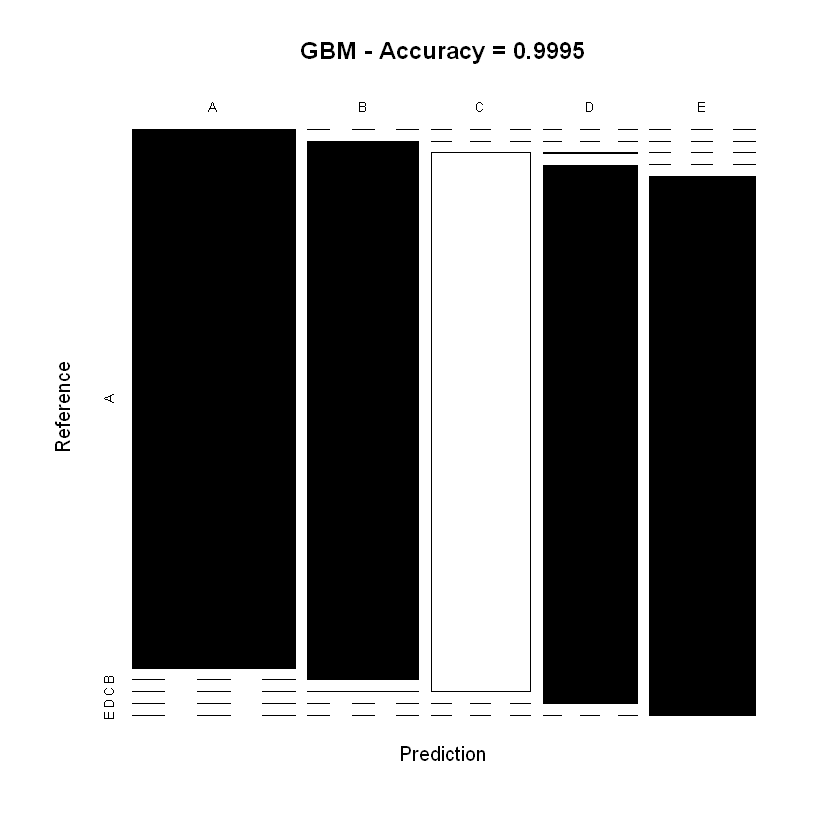

In [55]:
plot(confMatGBM$table, col = confMatGBM$byClass, 
     main = paste("GBM - Accuracy =", round(confMatGBM$overall['Accuracy'], 4)))

In [69]:
predictionRF <- predict(modFitRF, TestSet)
predictionRF

[1] A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A
  [38] A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A
  [75] A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A
 [112] A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A
 [149] A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A
 [186] A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A
 [223] A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A
 [260] A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A
 [297] A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A
 [334] A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A
 [371] A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A
 [408] A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A
 [445] A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A
 [482] A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A
 [519] A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A
 [556] A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A
 [593] A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A
 [630] A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A
 [667] A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A
 [704] A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A
 [741] A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A
 [778] A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A
 [815] A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A
 [852] A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A
 [889] A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A
 [926] A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A
 [963] A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A
[1000] A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A
[1037] A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A
[1074] A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A
[1111] A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A
[1148] A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A
[1185] A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A
[1222] A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A
[1259] A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A
[1296] A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A
[1333] A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A
[1370] A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A
[1407] A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A
[1444] A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A
[1481] A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A
[1518] A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A
[1555] A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A
[1592] A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A
[1629] A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A
[1666] A A A A A A A A A B B B B B B B B B B B B B B B B B B B B B B B B B B B B
[1703] B B B B B B B B B B B B B B B B B B B B B B B B B B B B B B B B B B B B B
[1740] B B B B B B B B B B B B B B B B B B B B B B B B B B B B B B B B B B B B B
[1777] B B B B B B B B B B B B B B B B B B B B B B B B B B B B B B B B B B B B B
[1814] B B B B B B B B B B B B B B

In [71]:
predictionDT <- predict(modFitDT, TestSet)
predictionDT

,A,B,C,D,E
5,1,0,0,0,0
7,1,0,0,0,0
12,1,0,0,0,0
24,1,0,0,0,0
26,1,0,0,0,0
30,1,0,0,0,0
33,1,0,0,0,0
36,1,0,0,0,0
38,1,0,0,0,0
43,1,0,0,0,0


In [70]:
predictionGBM <- predict(modFitGBM, TestSet)
predictionGBM

[1] A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A
  [38] A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A
  [75] A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A
 [112] A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A
 [149] A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A
 [186] A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A
 [223] A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A
 [260] A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A
 [297] A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A
 [334] A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A
 [371] A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A
 [408] A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A
 [445] A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A
 [482] A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A
 [519] A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A
 [556] A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A
 [593] A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A
 [630] A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A
 [667] A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A
 [704] A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A
 [741] A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A
 [778] A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A
 [815] A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A
 [852] A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A
 [889] A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A
 [926] A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A
 [963] A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A
[1000] A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A
[1037] A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A
[1074] A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A
[1111] A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A
[1148] A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A
[1185] A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A
[1222] A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A
[1259] A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A
[1296] A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A
[1333] A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A
[1370] A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A
[1407] A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A
[1444] A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A
[1481] A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A
[1518] A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A
[1555] A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A
[1592] A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A
[1629] A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A
[1666] A A A A A A A A A B B B B B B B B B B B B B B B B B B B B B B B B B B B B
[1703] B B B B B B B B B B B B B B B B B B B B B B B B B B B B B B B B B B B B B
[1740] B B B B B B B B B B B B B B B B B B B B B B B B B B B B B B B B B B B B B
[1777] B B B B B B B B B B B B B B B B B B B B B B B B B B B B B B B B B B B B B
[1814] B B B B B B B B B B B B B B